In [1]:

import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC, OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import os

target_column = 'Label'

# path to our CSV file
csv_file_path = r"combined_file.csv"

# Read the CSV file into a Pandas DataFrame
tf_df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
print(tf_df.head())


C:\Users\bkart\AppData\Local\Temp\ipykernel_8340\4293847447.py:32: DtypeWarning: Columns (78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  tf_df = pd.read_csv(csv_file_path)


    Destination Port   Flow Duration   Total Fwd Packets  \
0            54865.0             3.0                 2.0   
1            55054.0           109.0                 1.0   
2            55055.0            52.0                 1.0   
3            46236.0            34.0                 1.0   
4            54863.0             3.0                 2.0   

    Total Backward Packets  Total Length of Fwd Packets  \
0                      0.0                         12.0   
1                      1.0                          6.0   
2                      1.0                          6.0   
3                      1.0                          6.0   
4                      0.0                         12.0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           0.0                     6.0   
1                           6.0                     6.0   
2                           6.0                     6.0   
3                           6.0                 

In [2]:
#3235357
tf_df.shape

(3033050, 82)

In [3]:
# Get the columns of the DataFrame
columns = tf_df.columns

# Display the columns
print(columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [4]:
# Display basic information about the dataset
tf_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033050 entries, 0 to 3033049
Data columns (total 82 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             float64
 1    Flow Duration                float64
 2    Total Fwd Packets            float64
 3    Total Backward Packets       float64
 4   Total Length of Fwd Packets   float64
 5    Total Length of Bwd Packets  float64
 6    Fwd Packet Length Max        float64
 7    Fwd Packet Length Min        float64
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         float64
 11   Bwd Packet Length Min        float64
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [5]:
#listing all the null values
tf_df.isna().sum()

 Destination Port               202307
 Flow Duration                  202307
 Total Fwd Packets              202307
 Total Backward Packets         202307
Total Length of Fwd Packets     202307
                                ...   
 Idle Min                       202307
 Label                          202307
ipv4                           2830743
Label                          2830743
date                           2830743
Length: 82, dtype: int64

In [6]:
null_counts_per_row = tf_df.isnull().sum(axis=1)

# Count the number of rows with more than 6 null values
rows_with_more_than_six_nulls_count = (null_counts_per_row > 15).sum()
percentage_of_rows_with_more_than_six_nulls = (rows_with_more_than_six_nulls_count / len(tf_df)) * 100

# Print the count
print(f"Number of rows with more than 15 null values: {rows_with_more_than_six_nulls_count}")
print(f"Percentage of rows with more than 15 null values in the total dataset: {percentage_of_rows_with_more_than_six_nulls:.2f}%")


Number of rows with more than 15 null values: 202307
Percentage of rows with more than 15 null values in the total dataset: 6.67%


Since these rows have more than 15 null values out of 80 columns we are dropping them. We can fill the null values using mean, median, or mode but we choose to drop them. Because we have 3033050 records and these null value rows contain most of the values as null and their percentage is less than 10% in the whole dataset. It's better to drop them.

In [7]:
tf_df.drop(['ipv4','Label', 'date'],axis=1,inplace=True)
tf_df.dropna(inplace=True)
print("shape of dataset after dropping null values",tf_df.shape)

shape of dataset after dropping null values (2829385, 79)


In [8]:
# now let's check the null values
tf_df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

**Now our dataset is free from null values.

In [9]:
# Display summary statistics for numerical columns
print(tf_df.describe())


C:\Users\bkart\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\bkart\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


        Destination Port   Flow Duration   Total Fwd Packets  \
count       2.829385e+06    2.829385e+06        2.829385e+06   
mean        8.071249e+03    1.479276e+07        9.364763e+00   
std         1.828343e+04    3.366026e+07        7.498527e+02   
min         0.000000e+00   -1.300000e+01        1.000000e+00   
25%         5.300000e+01    1.550000e+02        2.000000e+00   
50%         8.000000e+01    3.132700e+04        2.000000e+00   
75%         4.430000e+02    3.221416e+06        5.000000e+00   
max         6.553500e+04    1.200000e+08        2.197590e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.829385e+06                 2.829385e+06   
mean              1.039869e+01                 5.495661e+02   
std               9.976276e+02                 9.995980e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00               

In [10]:
#Getting the count of each type of attack
label_counts = tf_df[' Label'].value_counts()
print(label_counts)


 Label
BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [11]:
#Converting 'int64' and 'float64' to 'int32' and 'float32' to save memory
# Identify integer and float columns
integer_columns = tf_df.select_dtypes(include=['int64']).columns
float_columns = tf_df.select_dtypes(include=['float64']).columns

# Convert integer columns to int32
tf_df[integer_columns] = tf_df[integer_columns].astype('int32')

# Convert float columns to float32
tf_df[float_columns] = tf_df[float_columns].astype('float32')

# Display updated DataFrame information
tf_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2829385 entries, 0 to 3033049
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             float32
 1    Flow Duration                float32
 2    Total Fwd Packets            float32
 3    Total Backward Packets       float32
 4   Total Length of Fwd Packets   float32
 5    Total Length of Bwd Packets  float32
 6    Fwd Packet Length Max        float32
 7    Fwd Packet Length Min        float32
 8    Fwd Packet Length Mean       float32
 9    Fwd Packet Length Std        float32
 10  Bwd Packet Length Max         float32
 11   Bwd Packet Length Min        float32
 12   Bwd Packet Length Mean       float32
 13   Bwd Packet Length Std        float32
 14  Flow Bytes/s                  float32
 15   Flow Packets/s               float32
 16   Flow IAT Mean                float32
 17   Flow IAT Std                 float32
 18   Flow IAT Max              

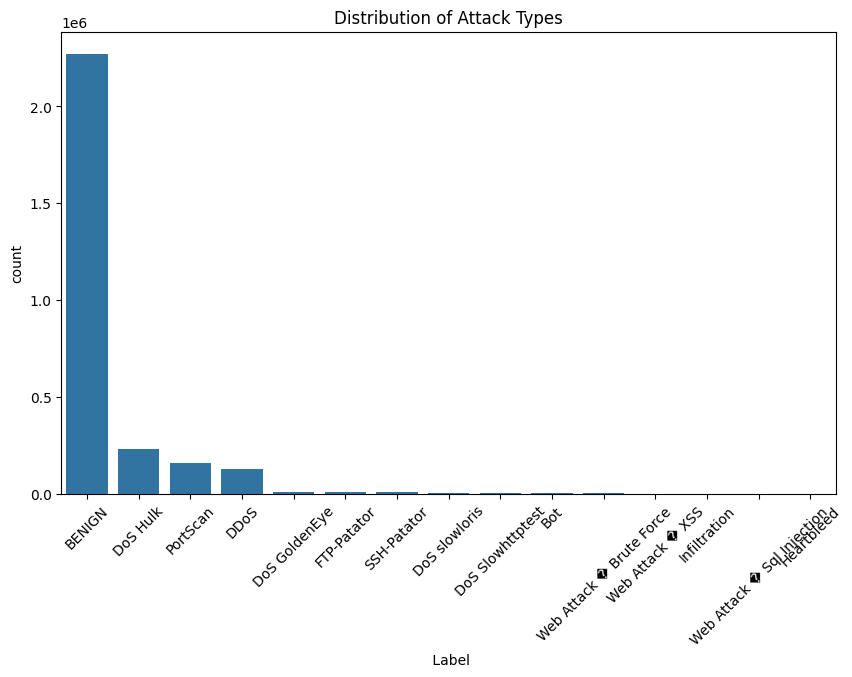

In [12]:
# Visualize the distribution of the target variable 'Label'
plt.figure(figsize=(10, 6))
sns.countplot(x=' Label', data=tf_df, order=tf_df[' Label'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xticks(rotation=45)
plt.show()



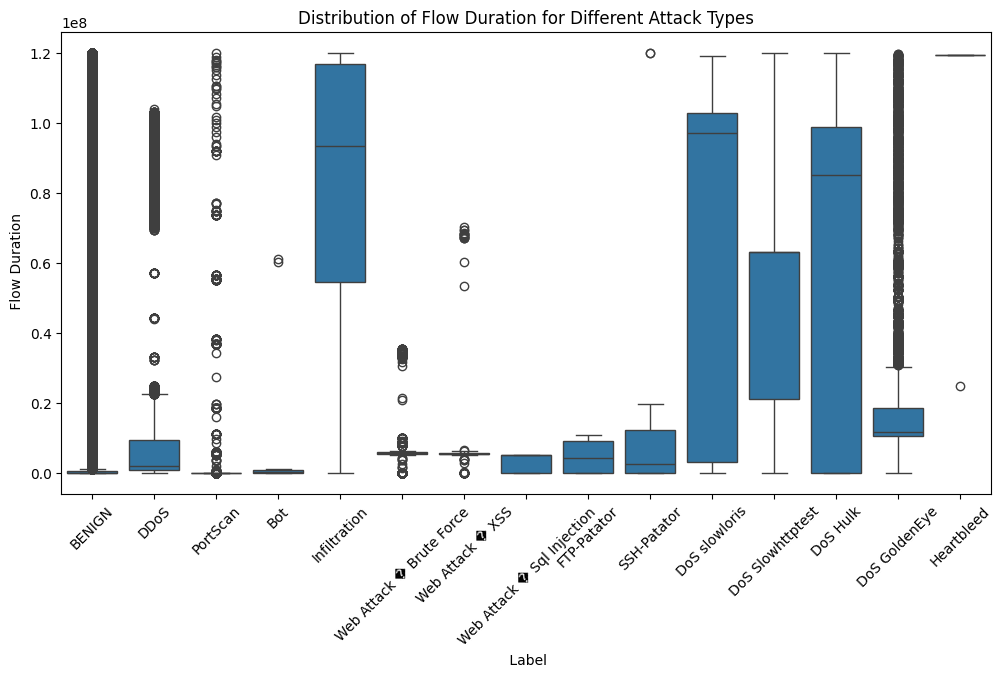

In [13]:
# Visualize the distribution of a specific feature (e.g., 'Flow Duration') for each attack type
plt.figure(figsize=(12, 6))
sns.boxplot(x=' Label', y=' Flow Duration', data=tf_df)
plt.title('Distribution of Flow Duration for Different Attack Types')
plt.xticks(rotation=45)
plt.show()




In [15]:
num_columns = tf_df.select_dtypes(include=[np.number]).columns
correlation_matrix = tf_df[num_columns].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


#since its a lage dataset with more input variables its better to print matrix instead of plotting the heatmap. 

In [16]:
correlation_matrix

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.151719,-0.004237,-0.003948,0.011148,-0.003082,0.097956,-0.045396,0.140263,0.128898,...,-0.003227,0.000897,-0.035569,-0.043727,-0.051870,-0.023199,-0.112612,0.010403,-0.108211,-0.114642
Flow Duration,-0.151719,1.000000,0.020856,0.019668,0.065448,0.016186,0.273265,-0.105303,0.143633,0.234399,...,0.015941,-0.001357,0.189282,0.241050,0.294018,0.121155,0.768019,0.243143,0.779511,0.738311
Total Fwd Packets,-0.004237,0.020856,1.000000,0.999070,0.365508,0.996993,0.009356,-0.002990,0.000030,0.001402,...,0.887387,-0.000184,0.039936,0.008328,0.030458,0.041283,0.001818,0.000809,0.001904,0.001669
Total Backward Packets,-0.003948,0.019668,0.999070,1.000000,0.359451,0.994429,0.009037,-0.002601,-0.000335,0.001025,...,0.882566,0.000018,0.038962,0.006436,0.028601,0.041277,0.001424,0.000491,0.001454,0.001328
Total Length of Fwd Packets,0.011148,0.065448,0.365508,0.359451,1.000000,0.353762,0.197026,-0.000283,0.185258,0.159783,...,0.407448,-0.001209,0.101082,0.103323,0.126489,0.068322,0.022651,0.027062,0.026070,0.018626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.023199,0.121155,0.041283,0.041277,0.068322,0.039069,0.105630,-0.025927,0.081157,0.094154,...,0.031394,-0.006834,0.905862,0.033869,0.584500,1.000000,0.118120,0.038297,0.122638,0.112867
Idle Mean,-0.112612,0.768019,0.001818,0.001424,0.022651,0.000808,0.181095,-0.071360,0.127913,0.183105,...,0.000836,-0.000875,0.120154,0.036534,0.088882,0.118120,1.000000,0.150234,0.990386,0.990215
Idle Std,0.010403,0.243143,0.000809,0.000491,0.027062,0.000105,0.178080,-0.029968,0.178450,0.191268,...,0.000720,-0.003720,0.070580,0.081430,0.069995,0.038297,0.150234,1.000000,0.283320,0.011591
Idle Max,-0.108211,0.779511,0.001904,0.001454,0.026070,0.000796,0.199519,-0.073476,0.148357,0.203272,...,0.000928,-0.001406,0.132683,0.055284,0.102794,0.122638,0.990386,0.283320,1.000000,0.961809


In [18]:
a=tf_df.head(500000)

In [19]:
from scipy.stats import f_oneway
import pandas as pd
import numpy as np

# Assuming 'a' is your DataFrame, and 'Label' is the target variable
num_columns = a.select_dtypes(include=[np.number]).columns
p_values = {}

for col in num_columns:
    categories = a[' Label'].unique()  # Change ' Label' to 'Label'
    group_data = [a[a[' Label'] == cat][col] for cat in categories]
    f_stat, p_value = f_oneway(*group_data)
    p_values[col] = p_value

# Set a threshold for p-value
p_value_threshold = 0.25

# Filter columns based on p-value threshold
selected_features = [feature for feature, p_value in p_values.items() if p_value < p_value_threshold]

# Create a new DataFrame with selected features
reduced_df = a[selected_features + [' Label']]  # Include the target variable


C:\Users\bkart\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [20]:
a.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

Here is the important columns after removing some irrelevent or less useful columns

In [21]:
a.shape

(500000, 79)

In [22]:
from scipy.stats import f_oneway

num_columns = a.select_dtypes(include=[np.number]).columns
for col in num_columns:  # Assuming num_columns are your numerical independent variables
    categories = a[' Label'].unique()
    group_data = [a[a[' Label'] == cat][col] for cat in categories]
    f_stat, p_value = f_oneway(*group_data)
    print(f"{col} - ANOVA test result: p-value = {p_value}")


 Destination Port - ANOVA test result: p-value = 0.0
 Flow Duration - ANOVA test result: p-value = 0.0
 Total Fwd Packets - ANOVA test result: p-value = 0.0
 Total Backward Packets - ANOVA test result: p-value = 0.0
Total Length of Fwd Packets - ANOVA test result: p-value = 0.0
 Total Length of Bwd Packets - ANOVA test result: p-value = 0.0
 Fwd Packet Length Max - ANOVA test result: p-value = 0.0
 Fwd Packet Length Min - ANOVA test result: p-value = 0.0
 Fwd Packet Length Mean - ANOVA test result: p-value = 0.0
 Fwd Packet Length Std - ANOVA test result: p-value = 0.0
Bwd Packet Length Max - ANOVA test result: p-value = 0.0
 Bwd Packet Length Min - ANOVA test result: p-value = 0.0
 Bwd Packet Length Mean - ANOVA test result: p-value = 0.0
 Bwd Packet Length Std - ANOVA test result: p-value = 0.0


C:\Users\bkart\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4178: RuntimeWarning: invalid value encountered in subtract
  alldata -= offset
C:\Users\bkart\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4186: RuntimeWarning: invalid value encountered in subtract
  ssbn += _square_of_sums(sample - offset,


Flow Bytes/s - ANOVA test result: p-value = nan
 Flow Packets/s - ANOVA test result: p-value = nan
 Flow IAT Mean - ANOVA test result: p-value = 0.0
 Flow IAT Std - ANOVA test result: p-value = 0.0
 Flow IAT Max - ANOVA test result: p-value = 0.0
 Flow IAT Min - ANOVA test result: p-value = 4.9108571021910927e-129
Fwd IAT Total - ANOVA test result: p-value = 0.0
 Fwd IAT Mean - ANOVA test result: p-value = 0.0
 Fwd IAT Std - ANOVA test result: p-value = 0.0
 Fwd IAT Max - ANOVA test result: p-value = 0.0
 Fwd IAT Min - ANOVA test result: p-value = 0.0
Bwd IAT Total - ANOVA test result: p-value = 0.0
 Bwd IAT Mean - ANOVA test result: p-value = 0.0
 Bwd IAT Std - ANOVA test result: p-value = 0.0
 Bwd IAT Max - ANOVA test result: p-value = 0.0
 Bwd IAT Min - ANOVA test result: p-value = 0.0
Fwd PSH Flags - ANOVA test result: p-value = 0.0


C:\Users\bkart\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


 Bwd PSH Flags - ANOVA test result: p-value = nan
 Fwd URG Flags - ANOVA test result: p-value = nan
 Bwd URG Flags - ANOVA test result: p-value = nan
 Fwd Header Length - ANOVA test result: p-value = 0.0
 Bwd Header Length - ANOVA test result: p-value = 0.0
Fwd Packets/s - ANOVA test result: p-value = 0.0
 Bwd Packets/s - ANOVA test result: p-value = 0.0
 Min Packet Length - ANOVA test result: p-value = 0.0
 Max Packet Length - ANOVA test result: p-value = 0.0
 Packet Length Mean - ANOVA test result: p-value = 0.0
 Packet Length Std - ANOVA test result: p-value = 0.0
 Packet Length Variance - ANOVA test result: p-value = 0.0
FIN Flag Count - ANOVA test result: p-value = 0.0
 SYN Flag Count - ANOVA test result: p-value = 0.0
 RST Flag Count - ANOVA test result: p-value = 4.661968989249454e-14
 PSH Flag Count - ANOVA test result: p-value = 0.0
 ACK Flag Count - ANOVA test result: p-value = 0.0
 URG Flag Count - ANOVA test result: p-value = 0.0
 CWE Flag Count - ANOVA test result: p-value

Here we can see the almost all the fetures have less p-value which shows that they aresignificant.

In [29]:


file_path = r"tdf.csv"

# Read the CSV file into a DataFrame
tdf = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
print(tdf.head(20))
print(tdf.shape)

               ipv4             Label        date
0       100.1.53.24  brute force host  2023-11-12
1    100.19.135.109  brute force host  2023-11-12
2      100.45.37.32  brute force host  2023-11-12
3       101.0.79.90  brute force host  2023-11-12
4    101.108.10.173  brute force host  2023-11-12
5    101.108.110.69  brute force host  2023-11-12
6    101.108.155.53  brute force host  2023-11-12
7   101.108.250.183  brute force host  2023-11-12
8    101.108.67.148  brute force host  2023-11-12
9     101.108.75.81  brute force host  2023-11-12
10   101.108.76.181  brute force host  2023-11-12
11    101.108.96.32  brute force host  2023-11-12
12     101.109.0.94  brute force host  2023-11-12
13    101.109.101.8  brute force host  2023-11-12
14  101.109.104.172  brute force host  2023-11-12
15   101.109.119.24  brute force host  2023-11-12
16  101.109.147.155  brute force host  2023-11-12
17  101.109.153.125  brute force host  2023-11-12
18   101.109.176.88  brute force host  2023-11-12


In [30]:
# Concatenate vertically
cdf = pd.concat([tf_df, tdf], ignore_index=True)

# Display the combined DataFrame
print(cdf)

          Destination Port   Flow Duration   Total Fwd Packets  \
0                  54865.0             3.0                 2.0   
1                  55054.0           109.0                 1.0   
2                  55055.0            52.0                 1.0   
3                  46236.0            34.0                 1.0   
4                  54863.0             3.0                 2.0   
...                    ...             ...                 ...   
3031687                NaN             NaN                 NaN   
3031688                NaN             NaN                 NaN   
3031689                NaN             NaN                 NaN   
3031690                NaN             NaN                 NaN   
3031691                NaN             NaN                 NaN   

          Total Backward Packets  Total Length of Fwd Packets  \
0                            0.0                         12.0   
1                            1.0                          6.0   
2           

In [31]:
print(cdf.shape)


(3031692, 82)


In [32]:
print(cdf.isnull().sum())


 Destination Port               202307
 Flow Duration                  202307
 Total Fwd Packets              202307
 Total Backward Packets         202307
Total Length of Fwd Packets     202307
                                ...   
 Idle Min                       202307
 Label                          202307
ipv4                           2829385
Label                          2829385
date                           2829385
Length: 82, dtype: int64


In [33]:
cdf = cdf.drop(['ipv4', 'Label', 'date'], axis=1)


In [34]:
print(cdf.isnull().sum())

cdf.fillna(22, inplace=True)  # Replace 'value' with the imputation value


 Destination Port              202307
 Flow Duration                 202307
 Total Fwd Packets             202307
 Total Backward Packets        202307
Total Length of Fwd Packets    202307
                                ...  
Idle Mean                      202307
 Idle Std                      202307
 Idle Max                      202307
 Idle Min                      202307
 Label                         202307
Length: 79, dtype: int64


In [ ]:
# Perform label encoding
label_encoder = LabelEncoder()
cdf['Label_encoded'] = label_encoder.fit_transform(cdf[' Label'])

# Handle missing values using SimpleImputer
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

print(cdf[' Label'].dtype)
# Define the features (X) and target variable (y)
X = cdf.drop([' Label', 'Label_encoded'], axis=1)
y = cdf['Label_encoded']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Signature-based detection models
signature_models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier()),
    ('SVM', SVC(probability=True)),
]

# Anomaly-based detection models
anomaly_models = [
    ('OneClassSVM', OneClassSVM()),
    ('IsolationForest', IsolationForest(random_state=42)),
    ('EllipticEnvelope', EllipticEnvelope()),
    ('LocalOutlierFactor', LocalOutlierFactor()),
    # Add more anomaly-based models as needed
]

# Hybrid model (Voting Classifier)
hybrid_model = VotingClassifier(estimators=signature_models + anomaly_models, voting='soft')

# Train and evaluate signature-based models
for name, model in signature_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n{classification_report(y_test, y_pred)}")

# Train and evaluate anomaly-based models
for name, model in anomaly_models:
    model.fit(X_train)
    y_pred = model.predict(X_test)
    y_pred[y_pred == 1] = 0  # Convert normal class to 0
    y_pred[y_pred == -1] = 1  # Convert anomaly class to 1
    print(f"\n{name}:\n{classification_report(y_test, y_pred)}")

# Train and evaluate hybrid model
hybrid_model.fit(X_train, y_train)
y_pred_hybrid = hybrid_model.predict(X_test)
print(f"\nHybrid Model:\n{classification_report(y_test, y_pred_hybrid)}")

In [ ]:
# Convert 'float64' to 'float32' and 'int64' to 'int32'
float_columns = cdf.select_dtypes(include=['float64']).columns
int_columns = cdf.select_dtypes(include=['int64']).columns
cdf[float_columns] = cdf[float_columns].astype('float32')
cdf[int_columns] = cdf[int_columns].astype('int32')


In [ ]:
# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = r"tdf.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
print(df.head())


import requests
import pandas as pd
import json

# Assuming your DataFrame is named 'df' and the IPv4 addresses are in the 'ipv4' column
ipv4_column = df['ipv4']

# AlienVault OTX API configuration
api_key = '7eeddf89313553770b1cb75c392cd7eef85a514e72eedcb61b79be02f11da5bb'
otx_api_url = 'https://otx.alienvault.com/api/v1/indicators/IPv4/'

for ipv4_address in ipv4_column:
    # Make a GET request to the AlienVault OTX API
    response = requests.get(otx_api_url + ipv4_address, headers={'X-OTX-API-KEY': api_key})

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Beautify and print the JSON response
        formatted_response = json.dumps(response.json(), indent=2)
        print(f"IPv4 Address: {ipv4_address}")
        print("OTX API Response:")
        print(formatted_response)
        print("\n")
    else:
        print(f"Error for IPv4 Address {ipv4_address}. Status Code: {response.status_code}")



             ipv4             Label        date
0     100.1.53.24  brute force host  2023-11-12
1  100.19.135.109  brute force host  2023-11-12
2    100.45.37.32  brute force host  2023-11-12
3     101.0.79.90  brute force host  2023-11-12
4  101.108.10.173  brute force host  2023-11-12
IPv4 Address: 100.1.53.24
OTX API Response:
{
  "whois": "http://whois.domaintools.com/100.1.53.24",
  "reputation": 0,
  "indicator": "100.1.53.24",
  "type": "IPv4",
  "type_title": "IPv4",
  "base_indicator": {
    "id": 487661988,
    "indicator": "100.1.53.24",
    "type": "IPv4",
    "title": "",
    "description": "",
    "content": "",
    "access_type": "public",
    "access_reason": ""
  },
  "pulse_info": {
    "count": 35,
    "pulses": [
      {
        "id": "6421c1a0fd8452595dc148fa",
        "name": "IP Addresses Logged by the Rosethorn PotNet",
        "description": "Malicious activity detections from a small network of honeypots that spans multiple ISPs and geographic locations.\n\nBe